In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from plot_prob import simulacion_suma, promedio_extracciones, promedio_extracciones_TCL

## Sumas de variables aleatorias

Comenzamos con una pregunta natural:

Si conocemos la distribución que siguen las VAs $X$ e $Y$: ¿cuál es la distribución de $X+Y$?

Al hablar de distribuciones bidimensionales hemos visto que para modelizar el vector $(X,Y)$ necesitamos una descripción conjunta, y no es suficiente con estudiar la distribución de $X$ y la de $Y$ por separado.
La distribución de $X+Y$ también depende de la relación entre ambas variables.

### Variables aleatorias independientes

Dos variables aleatorias son independientes si y sólo si:
$$
P(X\in A | Y \in B) = P(X\in A)
$$
o también
$$
P(X\in A \cap Y \in B) = P(X\in A)P(Y\in B)
$$
para cualesquiera subconjuntos $A$ del soporte de $X$ y $B$ del soporte de $Y$.
Para distribuciones continuas, es equivalente a decir que la función de densidad conjunta es el producto de las funciones de densidad:
$$
f(x,y) = f_X(x)f_Y(y)
$$
La relación entre ambas formulaciones la podemos ver integrando:
$$
\begin{split}
P(X\in A \cap Y \in B) &=  
\int_{A\times B}f(x,y)dxdy\\
P(X\in A)P(Y\in B)&=\int_{A}f_X(x)dx\int_{B}f_Y(y)dy
= \int_{A\times B}f_X(x)f_Y(y)dxdy
\end{split}
$$


**Si dos variables $X$ e $Y$ son independientes**, entonces
$$
E[XY] =  \int xyf(x,y)dxdy
=  \int xyf_X(x)f_Y(y)dxdy
=  \left(\int xf_X(x)dx\right) \left(\int yf_Y(y)dy\right)
=E[X]E[Y]
$$
y se sigue que
$$
Cov[X,Y] = E[(X-\mu_X)(Y-\mu_Y)] = E[XY] - \mu_X\mu_Y = 0
$$
y por tanto también, su *correlación es 0*.
Además:
$$
Var[X + Y] = E[(X+Y-\mu_X-\mu_Y)^2] = ... = Var[X] + Var[Y]
$$
Pero cuidado:

> *Dos variables aleatorias cuya correlación es cero no son necesariamente independientes.*


**Si X e Y son VAs independientes, y siguen distribuciones normales, su suma sigue una distribución normal.**

Comenzamos por simularlo... la siguiente gráfica muestra dos distribuciones de probabilidad continuas, y a la derecha el histograma de una muestra aleatoria obtenida sumando extracciones aleatorias de las dos distribuciones de la izquierda.

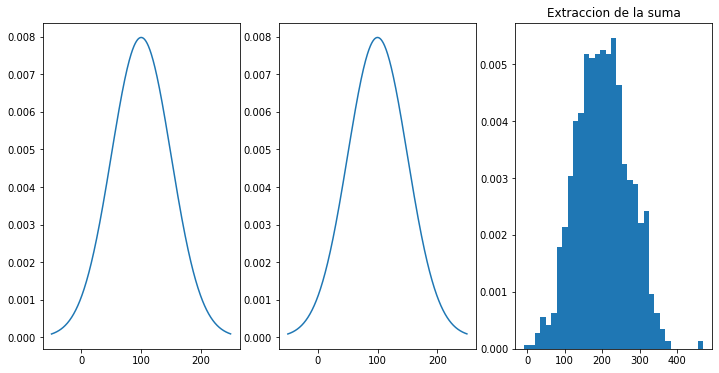

In [2]:
simulacion_suma(st.norm(100,50), st.norm(100,50), K=1000)

*¿Qué media y desviación tiene la normal obtenida?*

Recordamos que **siempre se verifica**:

$$
E[X + Y] = E[X] + E[Y]
$$
Por lo visto anteriormente, **si las variables son independientes**:
$$
Var[X + Y] = Var[X] + Var[Y]
$$
y ésto significa que si $X\sim N(\mu_X,\sigma_X)$, $Y\sim N(\mu_Y,\sigma_Y)$, entonces:
$$
X + Y \sim N\left(\mu=\mu_X + \mu_Y, \sigma=\sqrt{\sigma_X^2 + \sigma_Y^2}\right)
$$

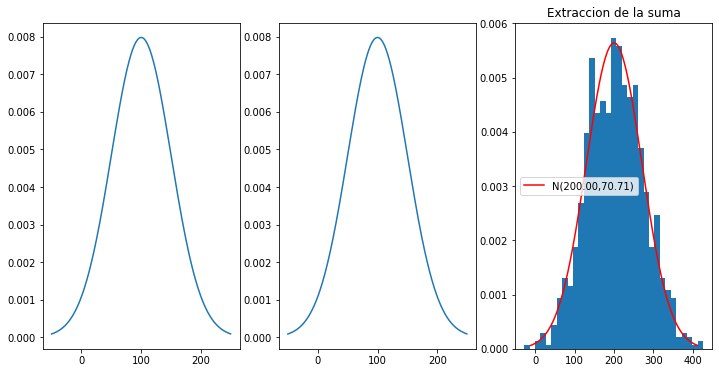

In [3]:
simulacion_suma(st.norm(100,50), st.norm(100,50), mostrar_suma=True)

### Suma de "n" normales independientes

Sumamos ``n`` normales *indepedientes* $X_i$ con la misma media $\mu$ y la misma desviación típica $\sigma$.

- **VAIs**: Acrónimo para *Variables Aleatorias Independientes*.
- **VAIIDs**: Acrónimo para *Variables Aleatorias Independientes e Idénticamente Distribuidas*. Podemos pensar que vaiids son *"distintos individuos de una misma población"*.Por ejemplo, todos los atunes de cierto mar, antes de pescarlos, son equivalentes: si sacamos uno del mar y lo pesamos, el peso seguirá una distribución normal con la misma media y la misma desviación típica, *pero cada atún tiene un peso distinto*. Lo mismo aplica a bombillas de la misma fábrica, alturas de personas adultas, etc...

Si $X_i$ es el peso del atún i-ésimo, el peso total de una muestra de ``n`` atunes es:
$$
S=\Sigma_{i=1}^n X_i
$$

*¿Qué media y desviación tiene la suma de ``n`` variables normales $X_i$?*

Por lo visto anteriormente:
$$
S \sim N(\mu_S = \Sigma_{i=1}^n \mu, \sigma_S^2 = \Sigma_{i=1}^n \sigma_X^2)
= N(n\mu, \sqrt{n}\sigma_X)
$$

### Promedio de "n" normales indepedientes
Si además dividimos por ``n`` para obtener el promedio:
$$
\frac{1}{n}S = \frac{1}{n}\Sigma_{i=1}^n X_i 
\sim N(\mu, \frac{1}{\sqrt{n}}\sigma_X)
$$
En particular, **si n es muy grande**, el promedio es aleatorio, pero cada vez oscila menos en torno a la media.

## Ley de los grandes números y teorema central del límite

Lo anterior no solo es cierto para variables normales, sino que _también es aproximadamente cierto para casi todas las distribuciones_.

> **Ley de los grandes números**: *Cuando hacemos promedios de extracciones aleatorias de VAIs $X_i$ que tienen todas media $\mu$, el valor promedio converge a la media de las variables $X_i$:*

$$
E[X_i]=\mu \Rightarrow \frac{1}{n}\Sigma_{i=1}^n X_i \rightarrow \mu
$$

No vamos a definir qué queremos decir exactamente al hablar de "convergencia de variables aleatorias". Hay más de una forma de medir esta convergencia, y por eso hay más de una forma de la ley de los grandes números (en particular, la *ley fuerte de los grandes números* y la *ley débil de los grandes números*).

https://en.wikipedia.org/wiki/Law_of_large_numbers

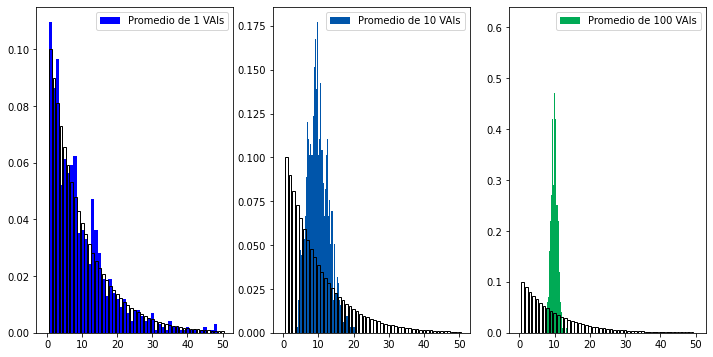

In [4]:
#Promedios de una Geometrica(0.1)
G = st.geom(0.1)
promedio_extracciones(G, [1,10,100], n0=50)

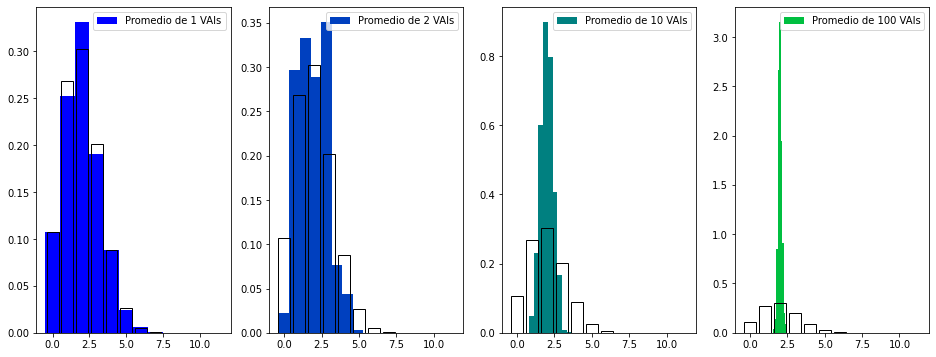

In [5]:
#Promedios de una Binomial(0.2, 10)
B = st.binom(p=0.2,n=10)
promedio_extracciones(B, [1,2,10,100], n0=11)

### Teorema central del límite

En vez de tomar el promedio podemos afinar un poco más:
Si $X_i$  son variables aleatorias independientes, de modo que

 - $E[X_i] = \mu$
 - $Var[X_i] = \sigma^2$

Entonces:

$$
\frac{{\frac {1}{n}}\sum_{i=1}^{n}X_{i}-\mu}{\frac{\sigma}{\sqrt{n}}}\longrightarrow
\mathcal{N}(0,1)
$$

o, dicho de otra forma:

$$
{\displaystyle {\bar {X}}={\frac {1}{n}}\sum _{i=1}^{n}X_{i}} \approx
\mathcal{N}(\mu, \sigma^2/n)
$$

Dibujamos el histograma de los promedios, y dibujamos la función de densidad de la gaussiana que aparece en el enunciado del teorema central del límite.

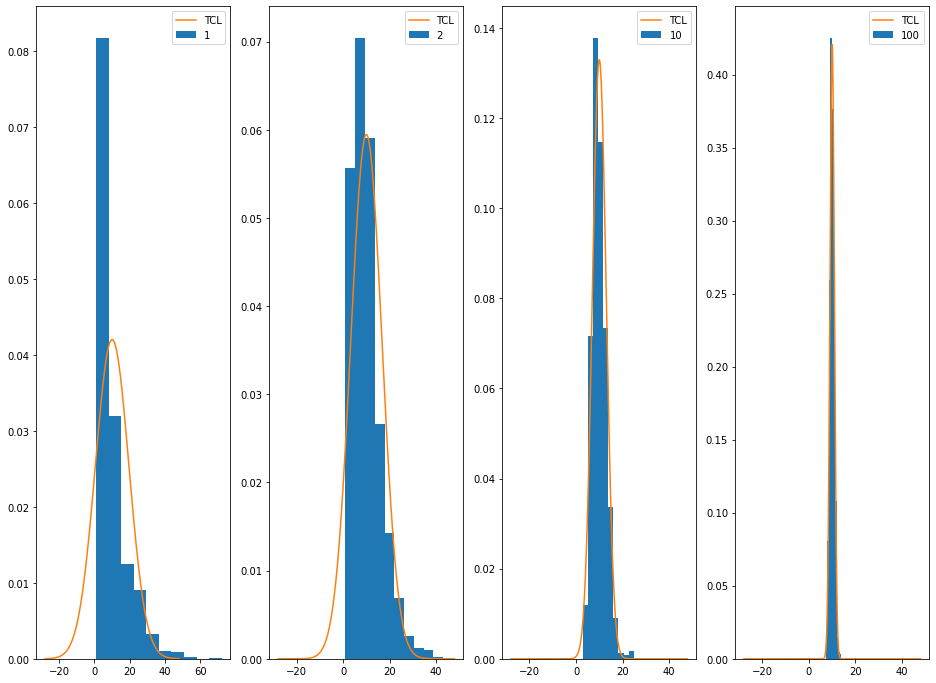

In [6]:
G = st.geom(0.1)
promedio_extracciones_TCL(G, [1,2,10,100])

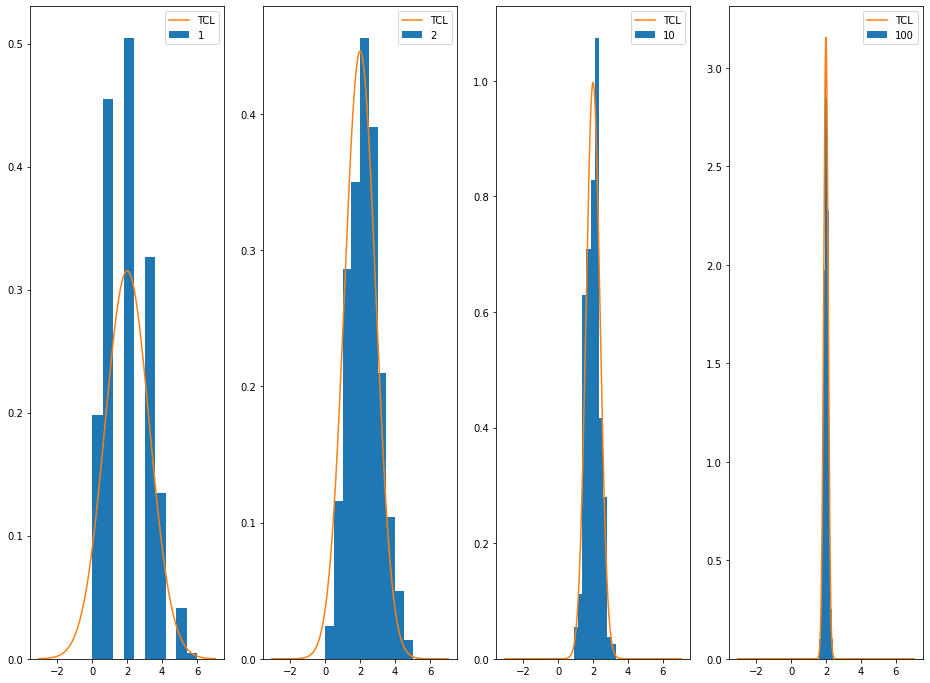

In [7]:
B = st.binom(p=0.2,n=10)
promedio_extracciones_TCL(B, [1,2,10,100])

El teorema central del límite es incluso cierto si las variables aleatorias independientes no tienen la misma media y la misma desviación:

> **Una suma $S=\Sigma_{i=1}^n X_i$ de variables aleatorias independientes $X_i$ se puede aproximar por una normal con la misma media y la misma varianza que $S$**

$$
E[S] = \Sigma_{i=1}^n E[X_i],\quad Var[S] = \Sigma_{i=1}^n Var[X_i]
$$ 

*Es por eso que tantos fenómenos naturales siguen una distribución gaussiana* (y es por eso que a la distribución gaussiana se la llama distribución **normal**).

Por ejemplo, el tiempo que tarda un autobús en hacer el recorrido, es la suma de los tiempos que tarda en cada parada, más los tiempos en cada semáforo, etc, donde cada uno de los tiempos sigue una distribución uniforme, o quizá exponencial, pero la suma total es aproximadamente normal.

Para más información sobre la ley de los grandes números y el teorema central del límite, os recomendamos:

 - [Chapter 4 of Bayesian Methods for Hackers](https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb)
 - [The most dangerous equation](http://nsmn1.uh.edu/dgraur/niv/TheMostDangerousEquation.pdf)